In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('../data/models-analysis/models.csv')

In [3]:
df = df.sort_values('amount_events')
df

,model,amount_events,auc
71,Gaussian NB,0,0.601444
63,Ensemble Classifier,0,0.610884
64,Logistic Regression,0,0.612387
65,Support Vector Machine (RBF Kernel),0,0.610298
70,KNN,0,0.530480
...,...,...,...
5,Random Forest,30,0.954241
6,Gradient Boosting Classifier,30,0.947963
7,KNN,30,0.889218
4,Adaboost,30,0.935061


In [4]:
fig = px.line(df, color='model', markers=True, x='amount_events', y='auc',labels={"amount_events": "Number of events considered","auc": "AUC/ROC Curve","model": "Modelos"},title="Relationship between the AUC obtained by the models and the number of events considered")
fig.update_traces(patch={"line": {"dash": 'dot'}}, selector={"legendgroup": "Gradient Boosting Classifier"})
fig.update_traces(patch={"line": {"dash": 'dot'}}, selector={"legendgroup": "Random Forest"})
fig.update_traces(patch={"line": {'color': 'black',"dash": 'dot'}}, selector={"legendgroup": "Gaussian NB"})
fig.show()

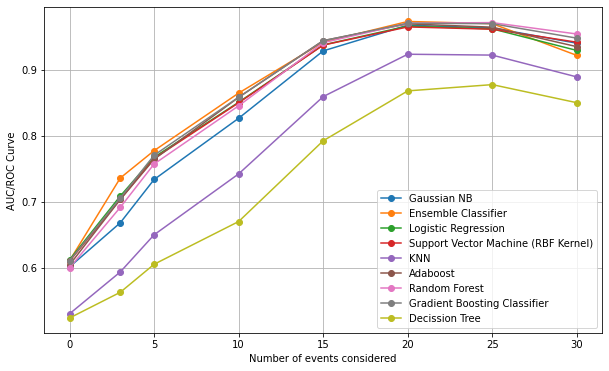

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados do CSV
data = pd.read_csv('../data/models-analysis/models.csv')
data = df.sort_values('amount_events')

# Filtrando os dados por modelo
model_names = data['model'].unique()

# Criando o gráfico
plt.figure(figsize=(10, 6))

for model_name in model_names:
    model_data = data[data['model'] == model_name]
    plt.plot(model_data['amount_events'], model_data['auc'], label=model_name, marker='o')

# Adicionando título e rótulos dos eixos
# plt.title('AUC/ROC Curve Value vs. Number of Events Considered')
plt.xlabel('Number of events considered')
plt.ylabel('AUC/ROC Curve')

# Adicionando legenda
plt.grid(True)
plt.legend()

plt.savefig('output.png', dpi=300, bbox_inches='tight')  # Exporta em 300 DPI

# Exibindo o gráfico
plt.grid(True)
plt.show()